In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-31 17:34:46.087734: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 17:34:46.087795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 17:34:46.089279: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
folder_path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"
folder_path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

1341
3875


In [3]:
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/"
path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"

img_width, img_height = 224, 224

datagen = ImageDataGenerator(rescale=1./255)

data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

data = np.concatenate([data_no, data_yes])
labels = np.concatenate([labels_no, labels_yes])

data, labels = shuffle(data, labels, random_state=42)
data_train=data/255.0

In [4]:
folder_path_test_normal = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
folder_path_test_pneumonia = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"

folder_test_no = os.listdir(folder_path_test_normal)
folder_test_yes = os.listdir(folder_path_test_pneumonia)

print(len(folder_test_no))
print(len(folder_test_yes))

234
390


In [5]:
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/"
path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"

img_width, img_height = 224, 224

datagen = ImageDataGenerator(rescale=1./255)

data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

data = np.concatenate([data_no, data_yes])
labels = np.concatenate([labels_no, labels_yes])

data, labels = shuffle(data, labels, random_state=42)
data_train=data/255.0

In [6]:
folder_path_test_normal = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
folder_path_test_pneumonia = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"

folder_test_no = os.listdir(folder_path_test_normal)
folder_test_yes = os.listdir(folder_path_test_pneumonia)

print(len(folder_test_no))
print(len(folder_test_yes))

234
390


In [7]:
test_no_label = [0]*len(folder_test_no)
test_yes_label = [1]*len(folder_test_yes)
test_labels = test_no_label + test_yes_label
print(len(test_labels))

624


In [8]:
path_no = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
path_yes = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"

img_width, img_height = 224, 224

datagen = ImageDataGenerator(rescale=1./255)

data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

data_test = np.concatenate([data_no, data_yes])
labels_test = np.concatenate([labels_no, labels_yes])

data_test_shuffled, labels_test_shuffled = shuffle(data_test, labels_test, random_state=42)

In [9]:
data_test_normalised=data_test_shuffled/255.0

In [10]:
x_train, x_val, y_train, y_val = train_test_split(data_train, labels, test_size=0.2, random_state=42)
x_test = np.concatenate([x_val, data_test_normalised])
y_test = np.concatenate([y_val, labels_test_shuffled])

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46552105 (177.58 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch 1/50


I0000 00:00:1706722663.503091     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 [==============================] - 51s 1s/step - loss: 4.8711 - accuracy: 0.8790 - val_loss: 4.3109 - val_accuracy: 0.8573
Epoch 2/50
33/33 [==============================] - 23s 712ms/step - loss: 3.4865 - accuracy: 0.9535 - val_loss: 3.2019 - val_accuracy: 0.8927
Epoch 3/50
33/33 [==============================] - 24s 731ms/step - loss: 2.6241 - accuracy: 0.9696 - val_loss: 2.4992 - val_accuracy: 0.9083
Epoch 4/50
33/33 [==============================] - 25s 772ms/step - loss: 2.0514 - accuracy: 0.9756 - val_loss: 1.9988 - val_accuracy: 0.9239
Epoch 5/50
33/33 [==============================] - 26s 783ms/step - loss: 1.6608 - accuracy: 0.9789 - val_loss: 1.7179 - val_accuracy: 0.9131
Epoch 6/50
33/33 [==============================] - 25s 757ms/step - loss: 1.3800 - accuracy: 0.9842 - val_loss: 1.4886 - val_accuracy: 0.9173
Epoch 7/50
33/33 [==============================] - 25s 767ms/step - loss: 1.1765 - accuracy: 0.9887 - val_loss: 1.3676 - val_accuracy: 0.9071
Epoch 8/50
33

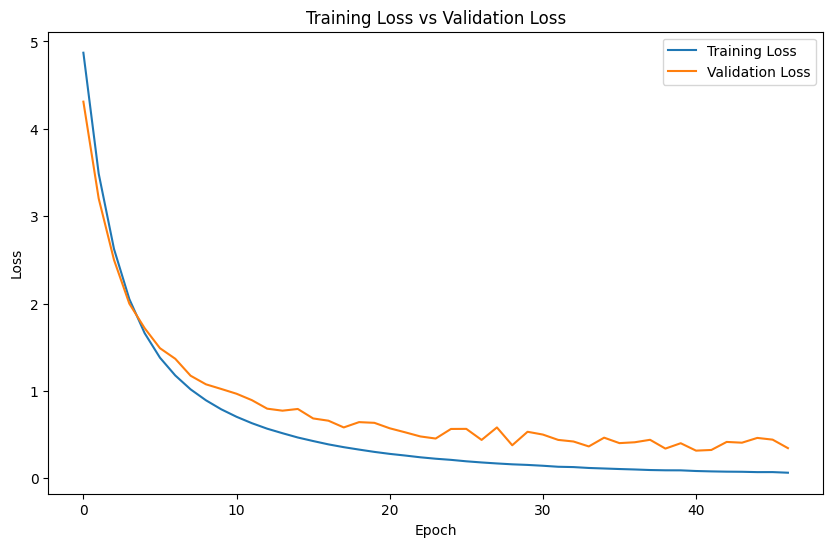

53/53 [==============================] - 10s 130ms/step - loss: 0.3160 - accuracy: 0.9293
Test Loss: 0.3160
Test Accuracy: 92.93%


In [11]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

pre_trained_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in pre_trained_model.layers:
    layer.trainable = False

model = Sequential()

model.add(pre_trained_model)

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")